<b><big> GDP per capita (USD $)</big></b> 💵
<br>
<br>
<b>Data downloaded from:</b> https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
<br>
<b>Data update by World Bank at</b> <u>30-06-2022</u>
<br>
<br>
Designed by
<br>
<br>
<img src="logo.png" width="250" height="320">
<br>
<br>
Oskar Mierkiewicz & Sebastian Woźniczka

In [192]:
import pandas as pd 
import numpy as np

In [193]:
#step 1 - load data

df = pd.read_excel("data.xlsx")

In [194]:
#step 2 - order data

data = df.drop(columns = ["Indicator Name", "Indicator Code"]).round(decimals = 1) 
#round values in entire dataframe

data.drop(data.iloc[:, 2:42] , axis=1, inplace=True)
#drop years with many NaN values (1960 - 1999)

data

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,20614.8,20417.8,20654.5,21070.1,22834.3,23591.2,24495.0,26452.2,...,25496.8,26442.4,26895.1,28399.1,28453.7,29348.4,30253.7,31135.9,23384.3,NaN
1,Africa Eastern and Southern,AFE,713.2,633.5,631.8,819.7,993.7,1129.7,1237.0,1382.7,...,1777.3,1748.9,1736.2,1556.3,1446.5,1629.4,1541.0,1511.3,1360.9,1557.7
2,Afghanistan,AFG,NaN,NaN,179.4,190.7,211.4,242.0,263.7,359.7,...,638.8,624.3,614.2,556.0,512.0,516.7,485.7,494.2,516.7,NaN
3,Africa Western and Central,AFW,525.5,539.3,627.8,707.0,854.5,1016.5,1252.6,1430.8,...,1965.1,2157.5,2212.9,1894.3,1673.8,1613.5,1704.1,1777.9,1709.8,1774.9
4,Angola,AGO,556.8,527.3,872.5,983.0,1255.6,1902.4,2599.6,3122.0,...,4978.4,5127.7,5094.1,3127.9,1728.0,2313.2,2524.9,2177.8,1631.4,2137.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.9,3704.8,3902.7,3520.8,3759.6,4009.4,4384.0,4416.1,4310.8,4986.6
262,"Yemen, Rep.",YEM,554.4,550.4,579.9,620.4,710.0,832.8,921.4,1017.3,...,1446.5,1607.2,1674.0,1601.8,1152.7,964.3,758.1,750.6,631.7,690.8
263,South Africa,ZAF,3374.7,2971.8,2797.1,4217.1,5409.1,6033.1,6266.5,6780.9,...,8222.2,7467.1,6988.8,6259.8,5757.0,6690.9,7005.1,6624.8,5655.9,6994.2
264,Zambia,ZMB,345.7,382.9,382.2,435.5,538.6,702.7,1047.9,1124.3,...,1763.1,1878.3,1762.4,1338.3,1280.8,1535.2,1516.4,1305.0,985.1,1120.6


In [195]:
data.count() #show us how many rows in columns are valid (with no NaN values)

Country Name    266
Country Code    266
2000            247
2001            248
2002            253
2003            253
2004            253
2005            253
2006            254
2007            254
2008            255
2009            255
2010            256
2011            259
2012            257
2013            258
2014            259
2015            258
2016            257
2017            257
2018            257
2019            255
2020            251
2021            229
dtype: int64

In [196]:
GDP = data.fillna(0) #changing NaN values for 0 - entire table

In [197]:
GDP

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,20614.8,20417.8,20654.5,21070.1,22834.3,23591.2,24495.0,26452.2,...,25496.8,26442.4,26895.1,28399.1,28453.7,29348.4,30253.7,31135.9,23384.3,0.0
1,Africa Eastern and Southern,AFE,713.2,633.5,631.8,819.7,993.7,1129.7,1237.0,1382.7,...,1777.3,1748.9,1736.2,1556.3,1446.5,1629.4,1541.0,1511.3,1360.9,1557.7
2,Afghanistan,AFG,0.0,0.0,179.4,190.7,211.4,242.0,263.7,359.7,...,638.8,624.3,614.2,556.0,512.0,516.7,485.7,494.2,516.7,0.0
3,Africa Western and Central,AFW,525.5,539.3,627.8,707.0,854.5,1016.5,1252.6,1430.8,...,1965.1,2157.5,2212.9,1894.3,1673.8,1613.5,1704.1,1777.9,1709.8,1774.9
4,Angola,AGO,556.8,527.3,872.5,983.0,1255.6,1902.4,2599.6,3122.0,...,4978.4,5127.7,5094.1,3127.9,1728.0,2313.2,2524.9,2177.8,1631.4,2137.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3410.9,3704.8,3902.7,3520.8,3759.6,4009.4,4384.0,4416.1,4310.8,4986.6
262,"Yemen, Rep.",YEM,554.4,550.4,579.9,620.4,710.0,832.8,921.4,1017.3,...,1446.5,1607.2,1674.0,1601.8,1152.7,964.3,758.1,750.6,631.7,690.8
263,South Africa,ZAF,3374.7,2971.8,2797.1,4217.1,5409.1,6033.1,6266.5,6780.9,...,8222.2,7467.1,6988.8,6259.8,5757.0,6690.9,7005.1,6624.8,5655.9,6994.2
264,Zambia,ZMB,345.7,382.9,382.2,435.5,538.6,702.7,1047.9,1124.3,...,1763.1,1878.3,1762.4,1338.3,1280.8,1535.2,1516.4,1305.0,985.1,1120.6


<b>Median Data</b>

In [198]:
MedianData = GDP.iloc[:, 2:] #skip columns with code and name of countries
MedianData = MedianData.median().round(decimals=1)
MDdf = pd.DataFrame(MedianData)
MDdf.reset_index(inplace=True) #convert index into dataframe's column
MDdf.columns = ['Year', 'GDP'] 
MDdf.dtypes #Year = object , GDP = float64
MDdf["Year"] = pd.to_numeric(MDdf["Year"]) #switch obejct type into int64 type
MDdf

,Year,GDP
0,2000,1697.8
1,2001,1760.8
2,2002,1976.0
3,2003,2256.4
4,2004,2635.1
5,2005,3078.2
6,2006,3447.6
7,2007,4059.8
8,2008,4522.5
9,2009,4232.7


In [199]:
MedianMax = MDdf['GDP'].max()
IndexNumber = MDdf.index[MDdf['GDP'] == MDdf['GDP'].max()].tolist()
MedianMaxYear = MDdf['Year'].loc[14]

print("World max median is equal to:", MedianMax, "and it's from year:", MedianMaxYear)
#IndexNumber

World max median is equal to: 6604.4 and it's from year: 2014


In [200]:
MedianMin = MDdf['GDP'].min()
IndexNumber = MDdf.index[MDdf['GDP'] == MDdf['GDP'].min()].tolist()
MedianMinYear = MDdf['Year'].loc[0]

print("World min median is equal to:", MedianMin, "and it's from year:", MedianMinYear)

#IndexNumber

World min median is equal to: 1697.8 and it's from year: 2000


In [201]:
from matplotlib import pyplot as plt 

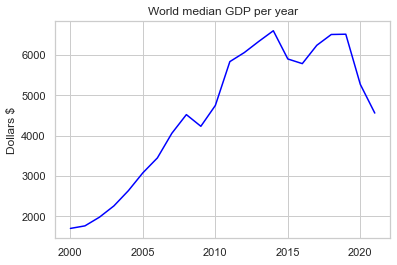

In [202]:
plt.plot(MDdf['Year'], MDdf['GDP'], color = 'blue', marker = '', linestyle = 'solid')
plt.title('World median GDP per year')
plt.ylabel('Dollars $')

plt.show()

<b>Mean Data</b>

In [203]:
MeanData = GDP.iloc[:, 2:] #skip columns with code and name of countries
MeanData = MeanData.mean().round(decimals=1)
MEdf = pd.DataFrame(MeanData)
MEdf.reset_index(inplace=True) #convert index into dataframe's column
MEdf.columns = ['Year', 'GDP'] 
MEdf.dtypes #Year = object , GDP = float64
MEdf["Year"] = pd.to_numeric(MEdf["Year"]) #switch obejct type into int64 type
MEdf

,Year,GDP
0,2000,7102.3
1,2001,7087.0
2,2002,7790.5
3,2003,8937.2
4,2004,10174.6
5,2005,10999.7
6,2006,12322.4
7,2007,14036.6
8,2008,15109.2
9,2009,13486.8


In [230]:
MeanMax = MEdf['GDP'].max()
IndexNumber = MEdf.index[MEdf['GDP'] == MEdf['GDP'].max()].tolist()
MeanMaxYear = MEdf['Year'].loc[18]

print("World max mean is equal to:", MeanMax, "and it's from year:", MeanMaxYear)
#IndexNumber

World max mean is equal to: 16746.7 and it's from year: 2018


In [232]:
MeanMin = MEdf['GDP'].min()
IndexNumber = MEdf.index[MEdf['GDP'] == MEdf['GDP'].min()].tolist()
MeanMinYear = MEdf['Year'].loc[1]

print("World min mean is equal to:", MeanMin, "and it's from year:", MeanMinYear)
#IndexNumber

World min mean is equal to: 7087.0 and it's from year: 2001


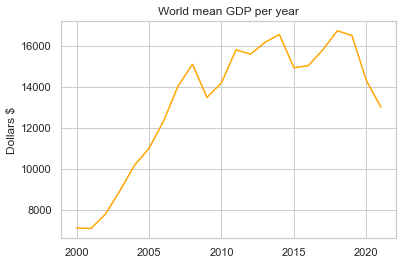

In [233]:
plt.plot(MEdf['Year'], MEdf['GDP'], color = 'orange', marker = '', linestyle = 'solid')
plt.title('World mean GDP per year')
plt.ylabel('Dollars $')

plt.show()

<b>Comparing mean with median</b>

In [205]:
MMdf = pd.merge(MDdf, MEdf, how = 'left', on = ['Year']) #merged two tables MDdf and MEdf, sorted by the year 
MMdf.columns = ['Year', 'Median', 'Mean']
MMdf = MMdf.set_index('Year') #index will add into the chart automaticlly as x label
MMdf

,Median,Mean
Year,,
2000,1697.8,7102.3
2001,1760.8,7087.0
2002,1976.0,7790.5
2003,2256.4,8937.2
2004,2635.1,10174.6
2005,3078.2,10999.7
2006,3447.6,12322.4
2007,4059.8,14036.6
2008,4522.5,15109.2


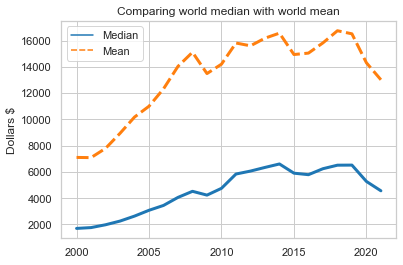

In [206]:
import seaborn as sns

sns.set_theme(style="whitegrid")

data = MMdf["Median"], MMdf["Mean"]

p = sns.lineplot(data=data, palette="tab10", linewidth=3)
p.set(ylabel = "Dollars $")
p.set(xlabel = '')
plt.title("Comparing world median with world mean")
plt.show()

<b>Load notes.csv </b>

In [207]:
Notes = pd.read_csv("notes.csv") 
Notes = Notes.drop(columns=['Unnamed: 5'])
Region = Notes.iloc[: , :3].dropna()
Region = Region.sort_values('Region')
Region

,Country Code,Region,IncomeGroup
128,LAO,East Asia & Pacific,Lower middle income
31,BRN,East Asia & Pacific,High income
106,IDN,East Asia & Pacific,Lower middle income
162,MNG,East Asia & Pacific,Lower middle income
163,MNP,East Asia & Pacific,High income
...,...,...,...
43,COD,Sub-Saharan Africa,Low income
42,CMR,Sub-Saharan Africa,Lower middle income
41,CIV,Sub-Saharan Africa,Lower middle income
223,SWZ,Sub-Saharan Africa,Lower middle income


In [208]:
income_group_counts = Region['IncomeGroup'].value_counts(dropna=False)
income_group_counts

High income            80
Lower middle income    54
Upper middle income    54
Low income             28
Name: IncomeGroup, dtype: int64

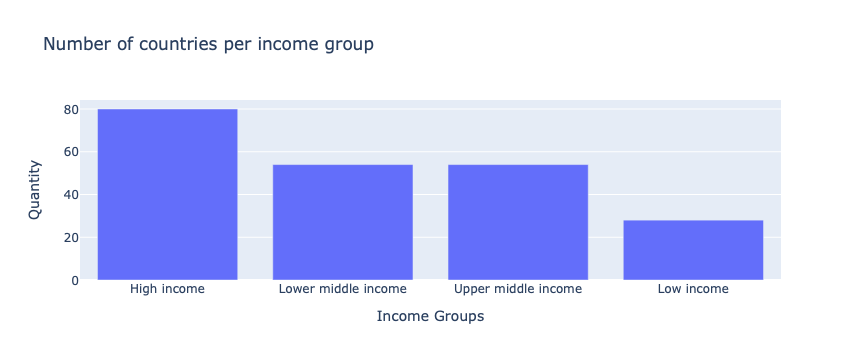

In [209]:
import plotly.express as px

px.bar(y=income_group_counts, 
       x=income_group_counts.index.astype(str), 
       labels= {
       "y": "Quantity",
       "x": "Income Groups"  },
       title='Number of countries per income group')

In [210]:
Region['Region'].value_counts(dropna=False).to_frame().style.background_gradient('cividis')
#how many times indicated region has been mentioned 

,Region
Europe & Central Asia,58
Sub-Saharan Africa,48
Latin America & Caribbean,41
East Asia & Pacific,37
Middle East & North Africa,21
South Asia,8
North America,3


In [211]:
GDP['is_country'] = GDP['Country Name'].notna()
GDP2 = GDP[['Country Name', 'Country Code', 'is_country']]
GDP2

,Country Name,Country Code,is_country
0,Aruba,ABW,True
1,Africa Eastern and Southern,AFE,True
2,Afghanistan,AFG,True
3,Africa Western and Central,AFW,True
4,Angola,AGO,True
...,...,...,...
261,Kosovo,XKX,True
262,"Yemen, Rep.",YEM,True
263,South Africa,ZAF,True
264,Zambia,ZMB,True


In [212]:
AlphaCode = pd.read_csv('PovStatsCountry.csv')
AlphaCode.sample(1)

#cuz we need Alpha-2-code to use library with countries flags

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
29,COG,Congo,"Congo, Rep.",Republic of Congo,CG,Central African CFA franc,NaN,Sub-Saharan Africa,Lower middle income,CG,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2007,Multiple Indicator Cluster Survey 2015/16,Core Welfare Indicator Questionnaire Survey (C...,NaN,2014-2015,2009.0,2017.0,NaN


In [213]:
AlphaCode = AlphaCode[['Country Code', '2-alpha code']]
GDPAlpha = pd.merge(GDP2, AlphaCode, how = 'left', on = ['Country Code'])
GDPAlpha = GDPAlpha.dropna().reset_index()
GDPAlpha = GDPAlpha.drop(columns = ["index"])
GDPAlpha = GDPAlpha.rename(columns = {'2-alpha code': '2alphaCode'}, inplace=False )
GDPAlpha

,Country Name,Country Code,is_country,2alphaCode
0,Afghanistan,AFG,True,AF
1,Angola,AGO,True,AO
2,Albania,ALB,True,AL
3,Argentina,ARG,True,AR
4,Armenia,ARM,True,AM
...,...,...,...,...
177,Kosovo,XKX,True,XK
178,"Yemen, Rep.",YEM,True,YE
179,South Africa,ZAF,True,ZA
180,Zambia,ZMB,True,ZM


In [214]:
array = ["Z4", "Z7", "8S", "1W", "F1"] #these values cause an error (include numbers)
#GDPAlpha.loc[~GDPAlpha["2-alpha code"].isin(array)] #when mentioned values are not in array
#GDPAlpha[GDPAlpha["2-alpha code"] == "Z4"]
GDPAlpha.loc[GDPAlpha["2alphaCode"].isin(array)]

,Country Name,Country Code,is_country,2alphaCode
41,East Asia & Pacific,EAS,True,Z4
42,Europe & Central Asia,ECS,True,Z7
49,Fragile and conflict affected situations,FCS,True,F1
137,South Asia,SAS,True,8S
175,World,WLD,True,1W


In [215]:
GDPAlpha = GDPAlpha.drop(GDPAlpha.index [[41, 42, 49, 137, 175]])

In [216]:
array2 = ("ZJ", "XM", "XN", "XO", "XG", "ZQ", "XP", "ZG", "XT") #rows which are not countries 
GDPAlpha.loc[GDPAlpha["2alphaCode"].isin(array2)]

,Country Name,Country Code,is_country,2alphaCode
69,IDA total,IDA,True,XG
91,Latin America & Caribbean,LCN,True,ZJ
92,Low income,LIC,True,XM
94,Lower middle income,LMC,True,XN
95,Low & middle income,LMY,True,XO
104,Middle East & North Africa,MEA,True,ZQ
106,Middle income,MIC,True,XP
145,Sub-Saharan Africa,SSF,True,ZG
168,Upper middle income,UMC,True,XT


In [217]:
GDPAlpha = GDPAlpha.drop(GDPAlpha.index[GDPAlpha['2alphaCode'].isin(array2)]) #remove unnecessary rows

In [218]:
from unicodedata import lookup
country_codes = GDPAlpha[GDPAlpha['is_country']]['2alphaCode'].str.lower().tolist()

def flag(letters): 
    if pd.isna(letters) or (letters.lower() not in country_codes):
        return '' 
    L0 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[0]}')
    L1 = lookup(f'REGIONAL INDICATOR SYMBOL LETTER {letters[1]}')
    return L0 + L1 

In [219]:
lookup('REGIONAL INDICATOR SYMBOL LETTER a')
#country_codes? # '?'question mark show us the info about variable or constant

'🇦'

In [220]:
print(*[flag(c) for c in country_codes])

🇦🇫 🇦🇴 🇦🇱 🇦🇷 🇦🇲 🇦🇺 🇦🇹 🇦🇿 🇧🇮 🇧🇪 🇧🇯 🇧🇫 🇧🇩 🇧🇬 🇧🇦 🇧🇾 🇧🇿 🇧🇴 🇧🇷 🇧🇹 🇧🇼 🇨🇫 🇨🇦 🇨🇭 🇨🇱 🇨🇳 🇨🇮 🇨🇲 🇨🇩 🇨🇬 🇨🇴 🇰🇲 🇨🇻 🇨🇷 🇨🇾 🇨🇿 🇩🇪 🇩🇯 🇩🇰 🇩🇴 🇩🇿 🇪🇨 🇪🇬 🇪🇷 🇪🇸 🇪🇪 🇪🇹 🇫🇮 🇫🇯 🇫🇷 🇫🇲 🇬🇦 🇬🇧 🇬🇪 🇬🇭 🇬🇳 🇬🇲 🇬🇼 🇬🇶 🇬🇷 🇬🇹 🇬🇾 🇭🇳 🇭🇷 🇭🇹 🇭🇺 🇮🇩 🇮🇳 🇮🇪 🇮🇷 🇮🇶 🇮🇸 🇮🇱 🇮🇹 🇯🇲 🇯🇴 🇯🇵 🇰🇿 🇰🇪 🇰🇬 🇰🇭 🇰🇮 🇰🇷 🇱🇦 🇱🇧 🇱🇷 🇱🇨 🇱🇰 🇱🇸 🇱🇹 🇱🇺 🇱🇻 🇲🇦 🇲🇩 🇲🇬 🇲🇻 🇲🇽 🇲🇰 🇲🇱 🇲🇹 🇲🇲 🇲🇪 🇲🇳 🇲🇿 🇲🇷 🇲🇺 🇲🇼 🇲🇾 🇳🇪 🇳🇬 🇳🇮 🇳🇱 🇳🇴 🇳🇵 🇵🇰 🇵🇦 🇵🇪 🇵🇭 🇵🇼 🇵🇬 🇵🇱 🇵🇹 🇵🇾 🇵🇸 🇷🇴 🇷🇺 🇷🇼 🇸🇩 🇸🇳 🇸🇧 🇸🇱 🇸🇻 🇷🇸 🇸🇸 🇸🇹 🇸🇷 🇸🇰 🇸🇮 🇸🇪 🇸🇿 🇸🇨 🇸🇾 🇹🇩 🇹🇬 🇹🇭 🇹🇯 🇹🇲 🇹🇱 🇹🇴 🇹🇹 🇹🇳 🇹🇷 🇹🇻 🇹🇿 🇺🇬 🇺🇦 🇺🇾 🇺🇸 🇺🇿 🇻🇪 🇻🇳 🇻🇺 🇼🇸 🇽🇰 🇾🇪 🇿🇦 🇿🇲 🇿🇼


In [221]:
GDPAlpha['flag'] = [flag(code) for code in GDPAlpha['2alphaCode']]
GDPAlpha.sample(5)

,Country Name,Country Code,is_country,2alphaCode,flag
125,Panama,PAN,True,PA,🇵🇦
129,Papua New Guinea,PNG,True,PG,🇵🇬
65,Honduras,HND,True,HN,🇭🇳
11,Burkina Faso,BFA,True,BF,🇧🇫
126,Peru,PER,True,PE,🇵🇪


<b>Merge GDPAlpha with GDP into one frame</b> 

In [222]:
GDPwithFlag = pd.merge(GDPAlpha, GDP, how = 'right', on = ['Country Name'])
GDPwithFlag = GDPwithFlag.dropna()
GDPwithFlag = GDPwithFlag.drop(columns = ['Country Code_y', 'is_country_y'])
GDPwithFlag = GDPwithFlag.rename(columns = {'Country Code_x': 'Country Code', 'is_country_x': 'is_country'}, inplace=False )
GDPwithFlag

,Country Name,Country Code,is_country,2alphaCode,flag,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Afghanistan,AFG,True,AF,🇦🇫,0.0,0.0,179.4,190.7,211.4,...,638.8,624.3,614.2,556.0,512.0,516.7,485.7,494.2,516.7,0.0
4,Angola,AGO,True,AO,🇦🇴,556.8,527.3,872.5,983.0,1255.6,...,4978.4,5127.7,5094.1,3127.9,1728.0,2313.2,2524.9,2177.8,1631.4,2137.9
5,Albania,ALB,True,AL,🇦🇱,1126.7,1281.7,1425.1,1846.1,2373.6,...,4247.6,4413.1,4578.6,3952.8,4124.1,4531.0,5287.7,5396.2,5332.2,6494.4
9,Argentina,ARG,True,AR,🇦🇷,7708.1,7208.4,2593.4,3349.8,4277.7,...,13082.7,13080.3,12334.8,13789.1,12790.2,14613.0,11795.2,10076.4,8585.7,10729.2
10,Armenia,ARM,True,AM,🇦🇲,622.7,694.4,783.2,930.1,1191.9,...,3681.8,3838.2,3986.2,3607.3,3591.8,3914.5,4220.5,4604.6,4266.0,4670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,True,XK,🇽🇰,0.0,0.0,0.0,0.0,0.0,...,3410.9,3704.8,3902.7,3520.8,3759.6,4009.4,4384.0,4416.1,4310.8,4986.6
262,"Yemen, Rep.",YEM,True,YE,🇾🇪,554.4,550.4,579.9,620.4,710.0,...,1446.5,1607.2,1674.0,1601.8,1152.7,964.3,758.1,750.6,631.7,690.8
263,South Africa,ZAF,True,ZA,🇿🇦,3374.7,2971.8,2797.1,4217.1,5409.1,...,8222.2,7467.1,6988.8,6259.8,5757.0,6690.9,7005.1,6624.8,5655.9,6994.2
264,Zambia,ZMB,True,ZM,🇿🇲,345.7,382.9,382.2,435.5,538.6,...,1763.1,1878.3,1762.4,1338.3,1280.8,1535.2,1516.4,1305.0,985.1,1120.6


<b>Merge Region with GDPwithFlag into one frame</b>

In [223]:
MainFrame = pd.merge(GDPwithFlag, Region, how = 'right', on = 'Country Code').dropna().reset_index(inplace=False)
MainFrame = MainFrame.drop(columns = 'index')
MainFrame

,Country Name,Country Code,is_country,2alphaCode,flag,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,Region,IncomeGroup
0,Lao PDR,LAO,True,LA,🇱🇦,325.2,326.9,320.1,362.8,417.9,...,2000.0,2140.0,2324.4,2455.2,2569.1,2613.9,2609.0,2551.3,East Asia & Pacific,Lower middle income
1,Indonesia,IDN,True,ID,🇮🇩,780.2,748.3,900.2,1065.6,1150.3,...,3491.6,3331.7,3562.8,3837.6,3893.9,4135.2,3870.6,4291.8,East Asia & Pacific,Lower middle income
2,Mongolia,MNG,True,MN,🇲🇳,474.2,524.1,571.6,646.2,798.0,...,4158.5,3875.3,3658.4,3687.1,4156.8,4404.8,4061.0,4534.9,East Asia & Pacific,Lower middle income
3,China,CHN,True,CN,🇨🇳,959.4,1053.1,1148.5,1288.6,1508.7,...,7636.1,8016.4,8094.4,8817.0,9905.3,10143.8,10408.7,12556.3,East Asia & Pacific,Upper middle income
4,Malaysia,MYS,True,MY,🇲🇾,4043.7,3913.4,4165.7,4461.8,4952.2,...,11319.1,9955.2,9817.8,10259.3,11380.1,11432.8,10412.3,11371.1,East Asia & Pacific,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,"Congo, Dem. Rep.",COD,True,CD,🇨🇩,405.2,153.6,175.0,173.8,194.0,...,486.8,497.3,471.3,467.1,565.8,596.6,544.0,584.1,Sub-Saharan Africa,Low income
163,Cameroon,CMR,True,CM,🇨🇲,681.1,687.6,759.1,950.6,1090.8,...,1604.2,1382.5,1413.3,1469.4,1585.2,1533.1,1537.1,1661.7,Sub-Saharan Africa,Lower middle income
164,Cote d'Ivoire,CIV,True,CI,🇨🇮,1007.5,997.5,1047.8,1207.5,1308.3,...,2156.6,1972.5,2013.4,2111.0,2314.1,2276.3,2325.7,2578.8,Sub-Saharan Africa,Lower middle income
165,Eswatini,SWZ,True,SZ,🇸🇿,1728.7,1521.8,1405.4,2148.6,2699.1,...,4039.2,3680.3,3425.5,3914.4,4107.1,3889.9,3434.7,4214.9,Sub-Saharan Africa,Lower middle income


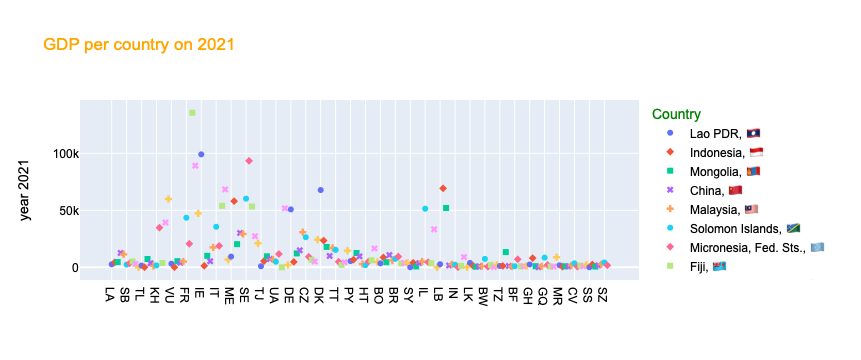

In [224]:
fig = px.scatter(MainFrame, x='2alphaCode', y='2021',
           color='Country Name',
           symbol='flag',
           title='GDP per country on 2021')

fig.update_layout(
    xaxis_title="",
    yaxis_title="year 2021",
    font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    title_font_color="orange",
    legend_title='Country',
    legend_title_font_color="green")
fig

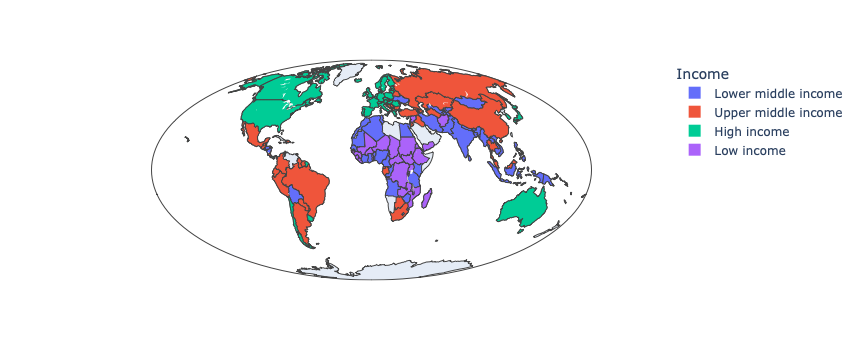

In [225]:
fig = px.choropleth(MainFrame, 
              locations="Country Code", 
              color='IncomeGroup', 
              projection='mollweide')
fig.update_layout(legend_title='Income')
fig

#count income groups and assign to country

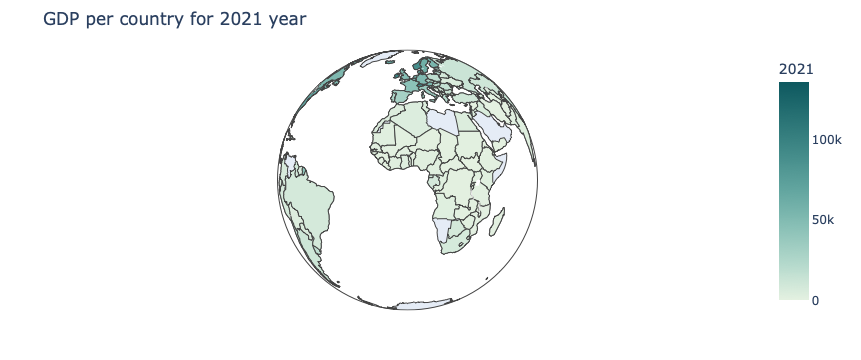

In [226]:
fig = px.choropleth(MainFrame, color='2021', 
                        locations='Country Code',
                        color_continuous_scale='mint', 
                 projection='orthographic', title='GDP per country for 2021 year')

fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))

fig.show()

In [312]:
import plotly.graph_objects as go

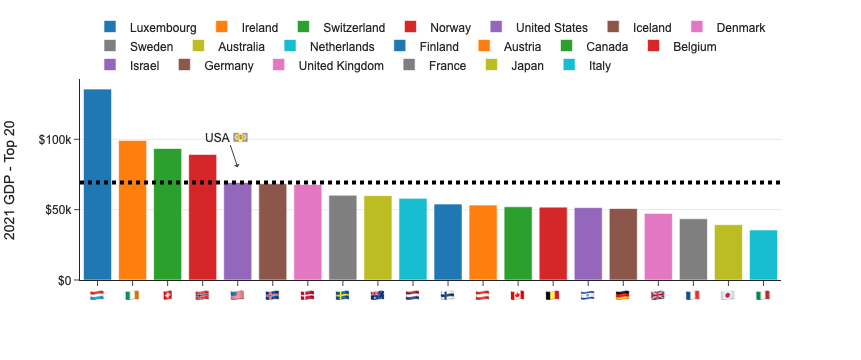

In [326]:
fig = px.histogram(YearGDP, x='flag', y='2021', color='Country Name',
            title="",
            #width=600, height=400,
            template="simple_white"
            )

fig.update_yaxes( #the y-axis is in dollars
    tickprefix="$", showgrid=True
)

fig.update_layout( #customize font and legend orientation & position
    font_family="Arial",
    xaxis_title="",
    yaxis_title="2021 GDP - Top 20",
    legend=dict(
        title=None, orientation="h", y=1, yanchor="bottom", x=0.5, xanchor="center",
    )
)

fig.add_shape( #line = target = avarage 
    type="line", line_color="black", line_width=4, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=69287, y1=69287, yref="y"
)

fig.add_annotation( #text above the chart's column
    text="USA 💵", x="🇺🇸", y=80000, arrowhead=1, showarrow=True
)


fig.show()